# Transfer Learning with OCT2017 data

For info about data:
https://www.nature.com/articles/s41598-023-30853-z#ref-CR20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!wget https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/4935bcd6-c7f7-4244-a119-baaf7175b2d8/file_downloaded

!wget https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/5699a1d8-d1b6-45db-bb92-b61051445347/file_downloaded

--2024-02-02 16:19:54--  https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/5699a1d8-d1b6-45db-bb92-b61051445347/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/9cfd5550-a37d-4404-9441-860ee091bc67 [following]
--2024-02-02 16:19:54--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/9cfd5550-a37d-4404-9441-860ee091bc67
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.106.200, 52.218.110.136, 3.5.68.112, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.106.200|

In [ ]:
!tar -xvf file_downloaded

Görüntülenen çıkış son 5000 satıra kısaltıldı.
./OCT2017/train/CNV/CNV-5674369-84.jpeg
./OCT2017/train/CNV/CNV-6666538-574.jpeg
./OCT2017/train/CNV/CNV-1188386-603.jpeg
./OCT2017/train/CNV/CNV-1781140-74.jpeg
./OCT2017/train/CNV/CNV-7315522-30.jpeg
./OCT2017/train/CNV/CNV-8082730-14.jpeg
./OCT2017/train/CNV/CNV-1781140-180.jpeg
./OCT2017/train/CNV/CNV-7907754-413.jpeg
./OCT2017/train/CNV/CNV-137351-113.jpeg
./OCT2017/train/CNV/CNV-4244160-134.jpeg
./OCT2017/train/CNV/CNV-9642260-283.jpeg
./OCT2017/train/CNV/CNV-732516-169.jpeg
./OCT2017/train/CNV/CNV-2192440-174.jpeg
./OCT2017/train/CNV/CNV-9206459-7.jpeg
./OCT2017/train/CNV/CNV-9598696-112.jpeg
./OCT2017/train/CNV/CNV-1651625-37.jpeg
./OCT2017/train/CNV/CNV-172472-51.jpeg
./OCT2017/train/CNV/CNV-1894770-40.jpeg
./OCT2017/train/CNV/CNV-4612183-53.jpeg
./OCT2017/train/CNV/CNV-9642260-241.jpeg
./OCT2017/train/CNV/CNV-8184974-60.jpeg
./OCT2017/train/CNV/CNV-2158821-4.jpeg
./OCT2017/train/CNV/CNV-9997680-79.jpeg
./OCT2017/train/CNV/CNV-495

In [ ]:
#!tar -xzf OCT2017.tar.gz

tar (child): OCT2017.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
pwd

'/content'

In [ ]:
# my_data= 'OCT2017/'

In [ ]:
my_data= '/content/OCT2017'

In [ ]:
os.listdir(my_data)

['test', 'train']

In [ ]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'

In [ ]:
os.listdir(train_path)

['DRUSEN', 'NORMAL', 'DME', 'CNV']

In [ ]:
os.listdir(test_path)

['DRUSEN', 'NORMAL', 'DME', 'CNV']

In [ ]:
os.listdir(train_path+'CNV')[:3]

['CNV-172472-272.jpeg', 'CNV-9138933-57.jpeg', 'CNV-1188386-802.jpeg']

In [ ]:
len(os.listdir(train_path+'DME'))

11348

In [ ]:
len(os.listdir(train_path+'CNV'))

37205

In [ ]:
len(os.listdir(train_path+'NORMAL'))

26315

In [ ]:
len(os.listdir(train_path+'DRUSEN'))

8616

In [ ]:
len(os.listdir(test_path+'DME'))

250

In [ ]:
len(os.listdir(test_path+'CNV'))

250

In [ ]:
len(os.listdir(test_path+'NORMAL'))

250

In [ ]:
len(os.listdir(test_path+'DRUSEN'))

250

In [ ]:
normal_path = train_path+'NORMAL/'+os.listdir(train_path+'NORMAL')[17]

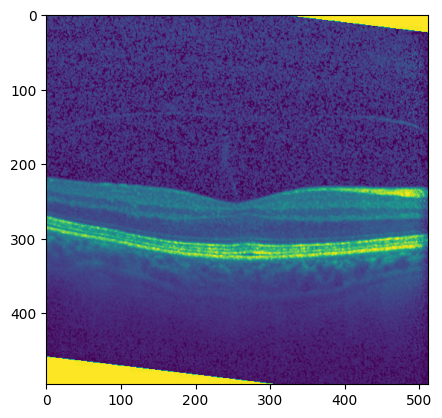

In [ ]:
normal = imread(normal_path)
plt.imshow(normal);

In [ ]:
normal.shape

(496, 512)

In [ ]:
x = []
y = []
for image in os.listdir(test_path+'NORMAL'):

    img = imread(test_path+'NORMAL/'+image)
    d1,d2= img.shape
    x.append(d1)
    y.append(d2)

In [ ]:
shape_list=[]
for image in os.listdir(test_path+'NORMAL'):

    img = imread(test_path+'NORMAL/'+image)
    x= img.shape
    shape_list.append(x)

In [ ]:
shape_list[:10]

[(496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512)]

In [ ]:
y[:11]

[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]

In [ ]:
np.mean(x)

496.0

In [ ]:
np.mean(y)

527.36

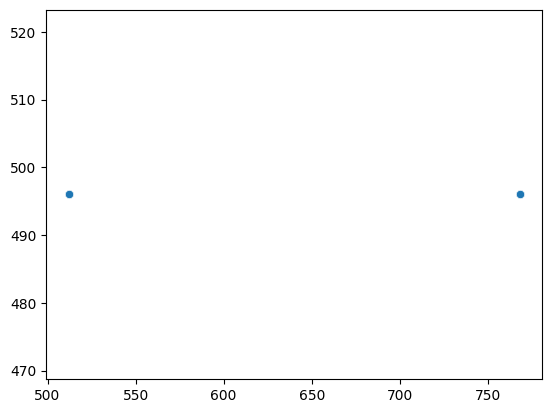

In [ ]:
sns.scatterplot(y=x,x=y);

In [ ]:
x = []
y = []
for image in os.listdir(test_path+'DME'):

    img = imread(test_path+'DME/'+image)
    d1,d2= img.shape
    x.append(d1)
    y.append(d2)

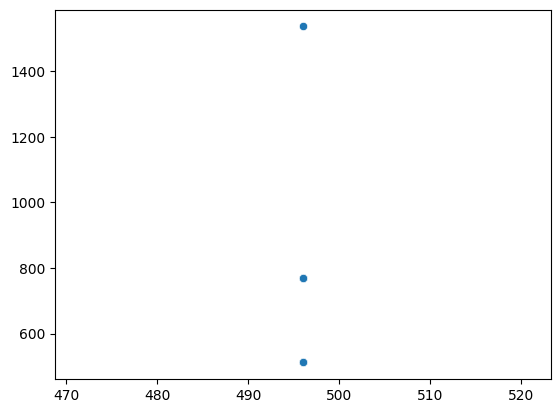

In [ ]:
sns.scatterplot(x=x,y=y);

In [ ]:
np.mean(x)

496.0

In [ ]:
np.mean(y)

627.712

In [ ]:
shape_list=[]
for image in os.listdir(test_path+'DME'):

    img = imread(test_path+'DME/'+image)
    x= img.shape
    shape_list.append(x)

In [ ]:
shape_list[:10]

[(496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 768),
 (496, 512),
 (496, 768),
 (496, 512),
 (496, 768),
 (496, 768)]

In [ ]:
x = []
y = []
for image in os.listdir(test_path+'CNV'):

    img = imread(test_path+'CNV/'+image)
    d1,d2= img.shape
    x.append(d1)
    y.append(d2)

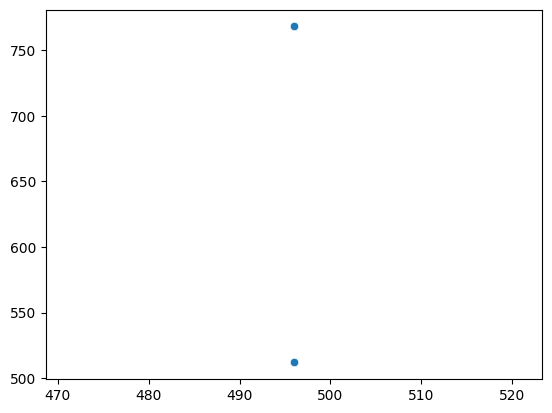

In [ ]:
sns.scatterplot(x=x,y=y);

In [ ]:
y[:10]

[768, 512, 512, 512, 768, 512, 512, 512, 768, 512]

In [ ]:
x

(496, 512)

In [ ]:
np.mean(x)

496.0

In [ ]:
np.mean(y)

581.632

In [ ]:
shape_list=[]
for image in os.listdir(test_path+'CNV'):

    img = imread(test_path+'CNV/'+image)
    x= img.shape
    shape_list.append(x)

In [ ]:
shape_list[:10]

[(496, 768),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 768),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 768),
 (496, 512)]

In [ ]:
shape_list=[]
for image in os.listdir(test_path+'DRUSEN'):

    img = imread(test_path+'DRUSEN/'+image)
    x= img.shape
    shape_list.append(x)

In [ ]:
shape_list[10:20]

[(496, 768),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 512),
 (496, 768)]

In [ ]:
x = []
y = []
for image in os.listdir(test_path+'DRUSEN'):

    img = imread(test_path+'DRUSEN/'+image)
    d1,d2= img.shape
    x.append(d1)
    y.append(d2)

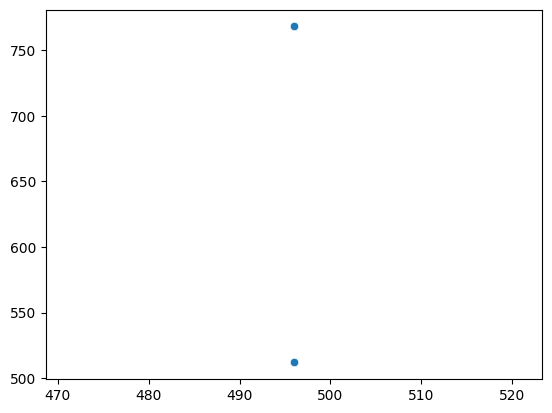

In [ ]:
sns.scatterplot(x=x,y=y);

In [ ]:
np.mean(x)

496.0

In [ ]:
np.mean(y)

550.912

average x = 496

average y = 571

In [ ]:
normal.max()

255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
drusen_path = train_path+'DRUSEN/'+os.listdir(train_path+'DRUSEN')[11]

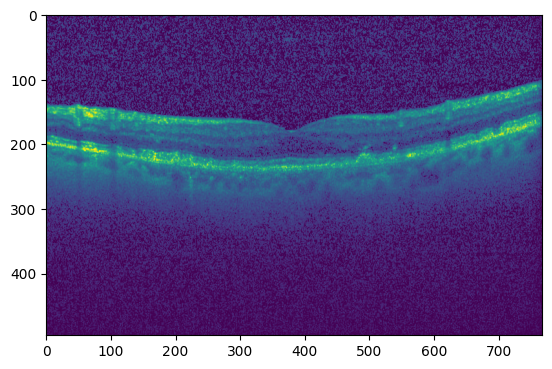

In [ ]:
drusen = imread(drusen_path)
plt.imshow(drusen);

In [ ]:
drusen.shape

(496, 768)

In [ ]:
plt.imshow(image_gen.random_transform(drusen));

ValueError: Input arrays must be multi-channel 2D images.

In [ ]:
drusen.ndim

2

In [ ]:
if drusen.ndim != 3:
    drusen = np.expand_dims(drusen, axis=-1)

In [ ]:
drusen.shape

(496, 768, 1)

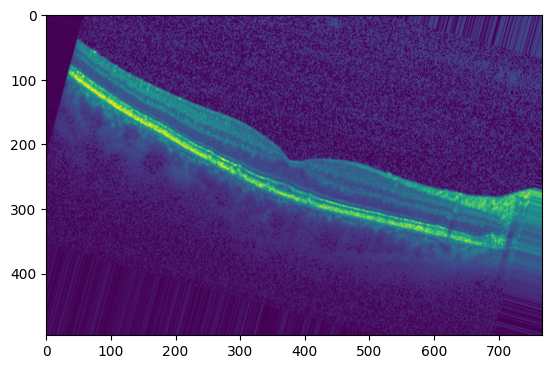

In [ ]:
plt.imshow(image_gen.random_transform(drusen));

In [ ]:
image_gen.flow_from_directory(train_path)

Found 83484 images belonging to 4 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 1000 images belonging to 4 classes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
image_shape = (300,300,1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(64, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)
batch_size = 32

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(300,300),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)

Found 83484 images belonging to 4 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(300,300),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)

Found 1000 images belonging to 4 classes.


In [ ]:
labels = {value: key for key, value in train_image_gen.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : CNV
1 : DME
2 : DRUSEN
3 : NORMAL


Choroidal Neovascularisation (CNV), 
Diabetic macular edema (DME), 
Drusen

In [ ]:
results = model.fit(train_image_gen,epochs=10,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/10
2609/2609 [==============================] - 915s 348ms/step - loss: 0.7229 - accuracy: 0.7224 - val_loss: 0.7201 - val_accuracy: 0.6960
Epoch 2/10
2609/2609 [==============================] - 844s 324ms/step - loss: 0.5191 - accuracy: 0.8089 - val_loss: 0.5192 - val_accuracy: 0.7910
Epoch 3/10
2609/2609 [==============================] - 817s 313ms/step - loss: 0.4525 - accuracy: 0.8339 - val_loss: 0.3535 - val_accuracy: 0.8750
Epoch 4/10
2609/2609 [==============================] - 819s 314ms/step - loss: 0.3969 - accuracy: 0.8578 - val_loss: 0.2658 - val_accuracy: 0.9080
Epoch 5/10
2609/2609 [==============================] - 794s 304ms/step - loss: 0.3525 - accuracy: 0.8757 - val_loss: 0.2176 - val_accuracy: 0.9370
Epoch 6/10
2609/2609 [==============================] - 809s 310ms/step - loss: 0.3244 - accuracy: 0.8847 - val_loss: 0.1795 - val_accuracy: 0.9510
Epoch 7/10
2609/2609 [==============================] - 807s 309ms/step - loss: 0.3031 - accuracy: 0.8927 - val_

In [ ]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.722883,0.722366,0.720128,0.696
1,0.519079,0.808874,0.519160,0.791
2,0.452464,0.833944,0.353463,0.875
3,0.396862,0.857793,0.265788,0.908
4,0.352533,0.875677,0.217647,0.937
5,0.324370,0.884661,0.179494,0.951
6,0.303124,0.892746,0.145259,0.954
7,0.290706,0.898280,0.231894,0.911
8,0.279987,0.901550,0.216662,0.919
9,0.270413,0.904844,0.183950,0.936


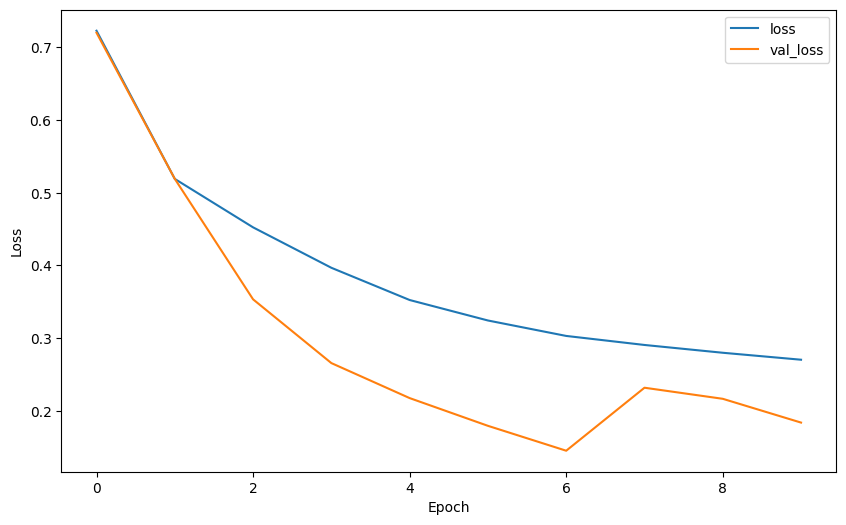

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

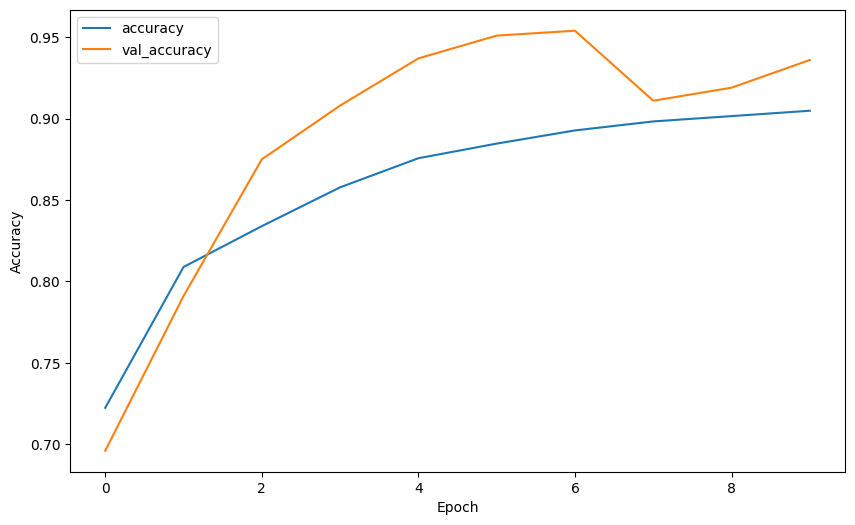

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred_probabilities = model.predict(test_image_gen)
predictions = pred_probabilities > 0.5
print(classification_report(y_true, y_pred, target_names=labels.values()))

32/32 [==============================] - 7s 196ms/step


In [ ]:
print(classification_report(test_image_gen.classes,predictions))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

In [ ]:
y_pred = np.argmax(pred_probabilities, axis=1)
y_true = test_image_gen.classes

**___________________________________________________________________________________________________________**

## ResNet152

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions

In [ ]:
image_shape=(300,300,3)

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152(include_top=False,
                   input_shape=image_shape,
                   pooling='max',
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(32, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))
resnet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                65568     
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 58436644 (222.92 MB)
Trainable params: 65700 (256.64 KB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 64

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(300,300),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=True)
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(300,300),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=True)


Found 83484 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
results = resnet_model.fit(train_image_gen,epochs=3,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/3
1266/1305 [============================>.] - ETA: 1:14 - loss: 1.2859 - accuracy: 0.4453

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
pred_probabilities = model.predict(test_image_gen)
predictions = pred_probabilities > 0.5

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

**________________________________________________________________________________________________________**

## VGG16

In [ ]:
image_size = (300,300,3)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(300,300,3))



In [ ]:
for layer in vgg.layers:
    layer.trainable =False

In [ ]:
x=Flatten()(vgg.output)
#dense_lyr = layers.Dense(64, activation='relu')
prediction=Dense(4,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

gen=ImageDataGenerator(rotation_range=20,
                       width_shift_range=0.1,
                       height_shift_range=0.1,
                       shear_range=0.1,
                       zoom_range=0.2,
                       rescale=1/255,
                       horizontal_flip=True,
                       vertical_flip=True,
                       preprocessing_function=preprocess_input)
batch_size = 64
train_generator = gen.flow_from_directory(train_path,
                                          target_size=(300,300),
                                          shuffle=True,
                                          batch_size=batch_size,)
test_generator = gen.flow_from_directory(test_path,
                                          target_size=(300,300),
                                          shuffle=True,
                                          batch_size=batch_size,)

Found 83484 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
tf.keras.optimizers.Adam()

In [ ]:
image_files = glob(train_path + '/*/*.jp*g')
test_image_files = glob(test_path + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_path + '/*')

print(len(image_files))

83484


In [ ]:
print(len(test_image_files))

1000


In [ ]:
epochs=5
# fit the model
r = model.fit_generator(train_generator,
                        validation_data=test_generator,
                        epochs=epochs,
                        steps_per_epoch=len(image_files) // batch_size,
                        validation_steps=len(test_image_files) // batch_size,
                        callbacks=[early_stop]
)

Epoch 1/5
1304/1304 [==============================] - 2345s 2s/step - loss: 0.5275 - accuracy: 0.8178 - val_loss: 0.2166 - val_accuracy: 0.9271
Epoch 2/5
1304/1304 [==============================] - 2210s 2s/step - loss: 0.4475 - accuracy: 0.8487 - val_loss: 0.3228 - val_accuracy: 0.8927
Epoch 3/5
1304/1304 [==============================] - 2174s 2s/step - loss: 0.4529 - accuracy: 0.8530 - val_loss: 0.3213 - val_accuracy: 0.8781


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
                             steps=STEP_SIZE_TEST,
                             verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

15/15 [==============================] - 24s 2s/step


In [ ]:
test =np.argmax(test_generator, axis=1)

In [ ]:
print(classification_report(test, predicted_class_indices))

In [ ]:
vgg16_5ep = pd.DataFrame(r.history)
vgg16_5ep

,loss,accuracy,val_loss,val_accuracy
0,0.527521,0.817813,0.216578,0.927083
1,0.447547,0.848693,0.322773,0.892708
2,0.452917,0.853021,0.321316,0.878125


In [ ]:
predicted_class_indices.shape

(960,)

In [ ]:
r.history

{'loss': [0.5275214314460754, 0.4475466310977936, 0.45291727781295776],
 'accuracy': [0.8178134560585022, 0.8486933708190918, 0.8530208468437195],
 'val_loss': [0.2165784388780594, 0.32277265191078186, 0.3213164508342743],
 'val_accuracy': [0.9270833134651184, 0.8927083611488342, 0.878125011920929]}

In [ ]:
#pred_probabilities = model.predict(test_image_gen)
predictions = pred_probabilities > 0.5
print(classification_report(y_true, predictions, target_names=labels.values()))

In [ ]:
from sklearn.metrics import classification_report

# Modelinizin tahminlerini ve gerçek etiketleri içeren değişkenler
y_pred = model.predict(X_test)
y_true = y_test

# Classification report'u yazdırın
print(classification_report(test_image_gen, pred))

In [ ]:
pred.shape

(960, 4)

In [ ]:
pred_probabilities.shape

(1000, 4)

In [ ]:
pred_probabilities = model.predict(test_generator)


16/16 [==============================] - 39s 2s/step
